More hidden layers

Dataset saved to 'ikp_dataset.csv'.
Epoch [10/200], Loss: 0.4143
Epoch [20/200], Loss: 0.3025
Epoch [30/200], Loss: 0.2463
Epoch [40/200], Loss: 0.2050
Epoch [50/200], Loss: 0.1515
Epoch [60/200], Loss: 0.1311
Epoch [70/200], Loss: 0.1048
Epoch [80/200], Loss: 0.0890
Epoch [90/200], Loss: 0.0750
Epoch [100/200], Loss: 0.0634
Epoch [110/200], Loss: 0.0682
Epoch [120/200], Loss: 0.0539
Epoch [130/200], Loss: 0.0599
Epoch [140/200], Loss: 0.0499
Epoch [150/200], Loss: 0.0497
Epoch [160/200], Loss: 0.0461
Epoch [170/200], Loss: 0.0381
Epoch [180/200], Loss: 0.0526
Epoch [190/200], Loss: 0.0412
Epoch [200/200], Loss: 0.0373


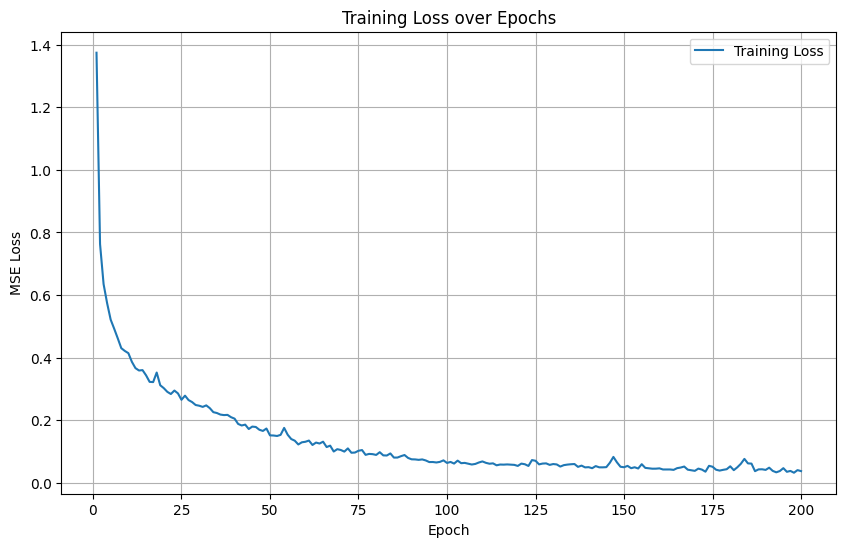

In [23]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Constants
L1, L2, L3 = 17, 19, 23
num_samples = 20

# Generate random joint angles
theta1 = np.random.uniform(-np.pi, np.pi, num_samples)
theta2 = np.random.uniform(-np.pi, np.pi, num_samples)
theta3 = np.random.uniform(-np.pi, np.pi, num_samples)

data = []

for t1 in theta1:
    for t2 in theta2:
        for t3 in theta3:
            x = L1 * np.cos(t1) + L2 * np.cos(t1 + t2) + L3 * np.cos(t1 + t2 + t3)
            y = L1 * np.sin(t1) + L2 * np.sin(t1 + t2) + L3 * np.sin(t1 + t2 + t3)
            phi = t1 + t2 + t3
            data.append([x, y, phi, t1, t2, t3])
            if len(data) >= 400:
                break
        else:
            continue
        break
    else:
        continue
    break

df = pd.DataFrame(data, columns=['x', 'y', 'phi', 'theta1', 'theta2', 'theta3'])

df.to_csv('ikp_dataset.csv', index=False)
print("Dataset saved to 'ikp_dataset.csv'.")

df = pd.read_csv('ikp_dataset.csv')

X = df[['x', 'y', 'phi']].values
Y = df[['theta1', 'theta2', 'theta3']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3, 64)  # Adjusted to 64 neurons
        self.fc2 = nn.Linear(64, 64)  # Adjusted to 64 neurons
        self.fc3 = nn.Linear(64, 3)   # Output layer remains the same

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

# Load pretrained model and adjust the layer dimensions
checkpoint = torch.load('your_model_checkpoint.pth', map_location=torch.device('cpu'))

# Adjusting the model to match checkpoint dimensions
model.fc1 = nn.Linear(3, checkpoint['fc1.weight'].shape[0])
model.fc2 = nn.Linear(checkpoint['fc2.weight'].shape[1], checkpoint['fc2.weight'].shape[0])
model.fc3 = nn.Linear(checkpoint['fc3.weight'].shape[1], checkpoint['fc3.weight'].shape[0])

# Load state_dict
model.load_state_dict(checkpoint)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lower learning rate

num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

def test_model(model, sample_input):
    input_tensor = torch.tensor(sample_input, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
    return output.numpy()

# model = MLP()
# model.load_state_dict(torch.load('your_model_checkpoint.pth', map_location=torch.device('cpu')))

# sample_input = [[35.1476, 22.8052, 1.0651]]
# predictions = test_model(model, sample_input)

# print('Predicted joint angles:')
# print(f'Theta1: {predictions[0, 0]:.4f}')
# print(f'Theta2: {predictions[0, 1]:.4f}')
# print(f'Theta3: {predictions[0, 2]:.4f}')


###same approach

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


L1, L2, L3 = 17, 19, 23
num_samples = 20


theta1 = np.random.uniform(-np.pi, np.pi, num_samples)
theta2 = np.random.uniform(-np.pi, np.pi, num_samples)
theta3 = np.random.uniform(-np.pi, np.pi, num_samples)


data = []


for t1 in theta1:
    for t2 in theta2:
        for t3 in theta3:
            x = L1 * np.cos(t1) + L2 * np.cos(t1 + t2) + L3 * np.cos(t1 + t2 + t3)
            y = L1 * np.sin(t1) + L2 * np.sin(t1 + t2) + L3 * np.sin(t1 + t2 + t3)
            phi = t1 + t2 + t3
            data.append([x, y, phi, t1, t2, t3])
            if len(data) >= 400:
                break
        else:
            continue
        break
    else:
        continue
    break


df = pd.DataFrame(data, columns=['x', 'y', 'phi', 'theta1', 'theta2', 'theta3'])


df.to_csv('ikp_dataset.csv', index=False)
print("Dataset saved to 'ikp_dataset.csv'.")


df = pd.read_csv('ikp_dataset.csv')


X = df[['x', 'y', 'phi']].values
Y = df[['theta1', 'theta2', 'theta3']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)


train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


torch.save(model.state_dict(), 'your_model_checkpoint.pth')
print("Model saved.")




def test_model(model, sample_input):

    input_tensor = torch.tensor(sample_input, dtype=torch.float32)


    model.eval()

    with torch.no_grad():

        output = model(input_tensor)

    return output.numpy()


model = MLP()
model.load_state_dict(torch.load('your_model_checkpoint.pth', map_location=torch.device('cpu')))


sample_input = [[35.1476, 22.8052, 1.0651]]


predictions = test_model(model, sample_input)


print('Predicted joint angles:')
print(f'Theta1: {predictions[0, 0]:.4f}')
print(f'Theta2: {predictions[0, 1]:.4f}')
print(f'Theta3: {predictions[0, 2]:.4f}')

#solution at t=0
theta1_analytical = np.pi/4 + np.pi/9 * np.sin(np.pi/5 * 0)
theta2_analytical = np.pi/6 + np.pi/18 * np.cos(np.pi/10 * 0)
theta3_analytical = -np.pi/9 - np.pi/36 * np.sin(np.pi/15 * 0)

print(f"Analytical Solution at t=0:")
print(f"Theta1: {np.degrees(theta1_analytical):.4f} degrees")
print(f"Theta2: {np.degrees(theta2_analytical):.4f} degrees")
print(f"Theta3: {np.degrees(theta3_analytical):.4f} degrees")


Dataset saved to 'ikp_dataset.csv'.
Epoch [10/200], Loss: 0.8576
Epoch [20/200], Loss: 0.5947
Epoch [30/200], Loss: 0.3938
Epoch [40/200], Loss: 0.4221
Epoch [50/200], Loss: 0.3773
Epoch [60/200], Loss: 0.2751
Epoch [70/200], Loss: 0.2629
Epoch [80/200], Loss: 0.2320
Epoch [90/200], Loss: 0.3374
Epoch [100/200], Loss: 0.2406
Epoch [110/200], Loss: 0.2699
Epoch [120/200], Loss: 0.1878
Epoch [130/200], Loss: 0.1664
Epoch [140/200], Loss: 0.1897
Epoch [150/200], Loss: 0.1837
Epoch [160/200], Loss: 0.2639
Epoch [170/200], Loss: 0.1807
Epoch [180/200], Loss: 0.1477
Epoch [190/200], Loss: 0.1493
Epoch [200/200], Loss: 0.1250
Model saved.
Predicted joint angles:
Theta1: -1.9794
Theta2: 4.0179
Theta3: -1.5355
Analytical Solution at t=0:
Theta1: 45.0000 degrees
Theta2: 40.0000 degrees
Theta3: -20.0000 degrees


###Same approach but i used ADAM OPTIMIZER

Dataset saved to 'ikp_dataset.csv'.
Epoch [10/200], Loss: 0.1717
Epoch [20/200], Loss: 0.1198
Epoch [30/200], Loss: 0.1025
Epoch [40/200], Loss: 0.0691
Epoch [50/200], Loss: 0.0511
Epoch [60/200], Loss: 0.0490
Epoch [70/200], Loss: 0.0343
Epoch [80/200], Loss: 0.0232
Epoch [90/200], Loss: 0.0231
Epoch [100/200], Loss: 0.0206
Epoch [110/200], Loss: 0.0156
Epoch [120/200], Loss: 0.0146
Epoch [130/200], Loss: 0.0109
Epoch [140/200], Loss: 0.0120
Epoch [150/200], Loss: 0.0073
Epoch [160/200], Loss: 0.0073
Epoch [170/200], Loss: 0.0082
Epoch [180/200], Loss: 0.0080
Epoch [190/200], Loss: 0.0085
Epoch [200/200], Loss: 0.0088


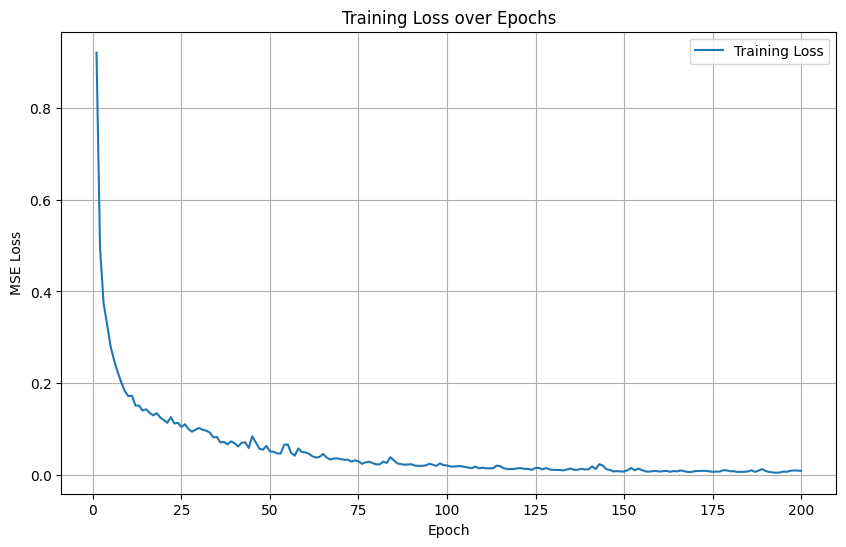

Predicted joint angles:
Theta1: 0.5791
Theta2: -0.2194
Theta3: 0.6246


In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




L1, L2, L3 = 17, 19, 23
num_samples = 20

# Generate random joint angles
theta1 = np.random.uniform(-np.pi, np.pi, num_samples)
theta2 = np.random.uniform(-np.pi, np.pi, num_samples)
theta3 = np.random.uniform(-np.pi, np.pi, num_samples)


data = []

for t1 in theta1:
    for t2 in theta2:
        for t3 in theta3:
            x = L1 * np.cos(t1) + L2 * np.cos(t1 + t2) + L3 * np.cos(t1 + t2 + t3)
            y = L1 * np.sin(t1) + L2 * np.sin(t1 + t2) + L3 * np.sin(t1 + t2 + t3)
            phi = t1 + t2 + t3
            data.append([x, y, phi, t1, t2, t3])
            if len(data) >= 400:
                break
        else:
            continue
        break
    else:
        continue
    break

df = pd.DataFrame(data, columns=['x', 'y', 'phi', 'theta1', 'theta2', 'theta3'])

df.to_csv('ikp_dataset.csv', index=False)
print("Dataset saved to 'ikp_dataset.csv'.")



df = pd.read_csv('ikp_dataset.csv')


X = df[['x', 'y', 'phi']].values
Y = df[['theta1', 'theta2', 'theta3']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)


train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()


checkpoint = torch.load('your_model_checkpoint.pth', map_location=torch.device('cpu'))

model.fc1 = nn.Linear(3, checkpoint['fc1.weight'].shape[0])
model.fc2 = nn.Linear(checkpoint['fc2.weight'].shape[1], checkpoint['fc2.weight'].shape[0])
model.fc3 = nn.Linear(checkpoint['fc3.weight'].shape[1], checkpoint['fc3.weight'].shape[0])


model.load_state_dict(checkpoint)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lower learning rate

num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


def test_model(model, sample_input):

    input_tensor = torch.tensor(sample_input, dtype=torch.float32)

    model.eval()

    with torch.no_grad():

        output = model(input_tensor)

    return output.numpy()


model = MLP()
model.load_state_dict(torch.load('your_model_checkpoint.pth', map_location=torch.device('cpu')))


sample_input = [[35.1476, 22.8052, 1.0651]]

predictions = test_model(model, sample_input)

print('Predicted joint angles:')
print(f'Theta1: {predictions[0, 0]:.4f}')
print(f'Theta2: {predictions[0, 1]:.4f}')
print(f'Theta3: {predictions[0, 2]:.4f}')
